In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

# Generate cycles to be tested

In [2]:
def generate_cycles(length):
    return [list(range(1, length)) + [n] for n in range(1, length)]

generate_cycles(10)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 1],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 2],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 3],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 4],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 5],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 6],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 7],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 8],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 9]]

# Algorithm 1: Search and collect the visited address

In [3]:
def cycle_detection_by_indexing(cycle):
    from_nodes = cycle[:-1]
    to_nodes = cycle[1:]
    sequence = dict(zip(from_nodes, to_nodes))
    
    current_node = 1
    visited_nodes = [1]
    steps = 1
    
    while len(visited_nodes) <= len(cycle):
        next_node = sequence[current_node]
        
        if next_node in visited_nodes:
            return {
                "steps": steps,
                "cycle_start": next_node
            }
        
        current_node = next_node
        visited_nodes.append(current_node)
        steps += 1
    
    return {
        "steps": steps,
        "cycle_start": None
    }

cycle_detection_by_indexing([1, 2, 3, 4, 5, 6, 7, 8, 9, 5])

{'steps': 9, 'cycle_start': 5}

# Algorithm 2: Search by one slow and one fast pointer (2x speed)
Require to reset pointers and perform second search to locate the cycle start position.

In [4]:
def cycle_detection_by_slow_fast_pointers(cycle):
    from_nodes = cycle[:-1]
    to_nodes = cycle[1:]
    sequence = dict(zip(from_nodes, to_nodes))
    
    current_node_slow = 1
    current_node_fast = 1
    steps = 1
    
    while True:
        next_node_slow = sequence[current_node_slow]
        next_node_fast = sequence[sequence[current_node_fast]] #One more step

        if next_node_slow == next_node_fast:
            # Found cycle, now look for the key node
            # Forget all the pointers
            # Create 1 pointer, start from node 1
            # Create another point, start from current found node
            
            current_node1 = 1
            current_node2 = next_node_slow
            
            while current_node1 != current_node2:
                current_node1 = sequence[current_node1]
                current_node2 = sequence[current_node2]
                steps += 1
            
            return {
                "steps": steps,
                "cycle_start": current_node1
            }

        current_node_slow = next_node_slow
        current_node_fast = next_node_fast
        steps += 1
    
    return {
        "steps": steps,
        "cycle_start": None
    }

cycle_detection_by_indexing([1, 2, 3, 4, 5, 6, 7, 8, 9, 5])

{'steps': 9, 'cycle_start': 5}

# Simulation

,01_steps,01_cycle_start,02_steps,02_cycle_start
cycle,,,,
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 1]",29,1,29,1
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 2]",29,2,29,2
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3]",29,3,29,3
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 4]",29,4,29,4
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 5]",29,5,29,5
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 6]",29,6,29,6
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 7]",29,7,29,7
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 8]",29,8,29,8
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 9]",29,9,29,9


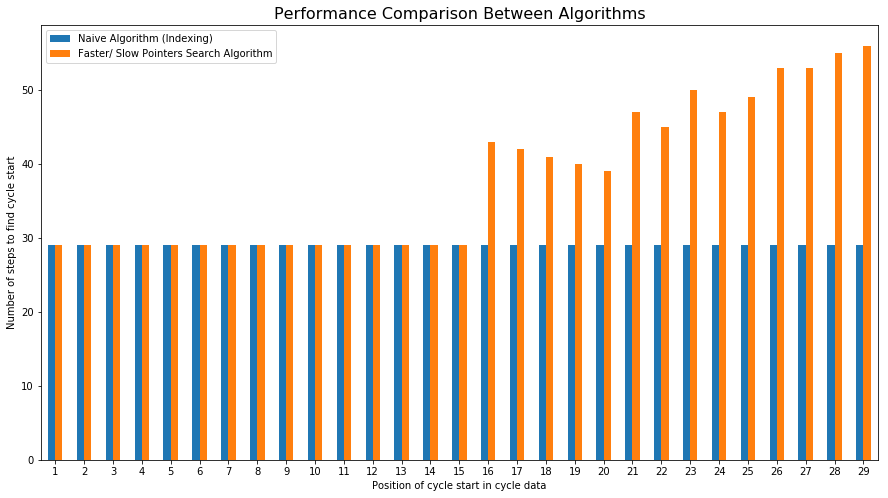

In [5]:
def simulate(cycle_length):
    cycles = generate_cycles(cycle_length)
    results1 = [cycle_detection_by_indexing(c) for c in cycles]
    results2 = [cycle_detection_by_slow_fast_pointers(c) for c in cycles]

    df = pd.DataFrame({
        'cycle': cycles,
        '01_steps': [r['steps'] for r in results1],
        '01_cycle_start': [r['cycle_start'] for r in results1],
        '02_steps': [r['steps'] for r in results2],
        '02_cycle_start': [r['cycle_start'] for r in results2],
    })
    df = df.set_index(['cycle'], drop=True)
    display(df)
    
    fig, ax = plt.subplots(figsize=(15, 8))

    df.plot.bar(ax=ax, y=['01_steps', '02_steps'], rot=0)
    legend = plt.legend()
    legend.get_texts()[0].set_text('Naive Algorithm (Indexing)')
    legend.get_texts()[1].set_text('Faster/ Slow Pointers Search Algorithm')
    ax.set_title('Performance Comparison Between Algorithms', fontsize=16)
    ax.set_xticklabels(range(1, df.shape[0] + 1))
    ax.set_ylabel('Number of steps to find cycle start')
    ax.set_xlabel('Position of cycle start in cycle data')

    plt.show()
    
simulate(30)

Considering number of steps to locate the cycle start position, algorithm 1 outperforms the another